# Recurrent Neural Networks
Son buenas en problemas de texto, npl y secuencias



In [1]:
# RNN from scratch
%matplotlib inline
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
print "INPUTS\n", inputs, "\nshape", np.shape(inputs)
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
print "W shape", np.shape(W)
U = np.random.random((output_features, output_features))
print "U shape", np.shape(W)
b = np.random.random((output_features,))
print "b shape", np.shape(W)

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print "Final shape",np.shape(final_output_sequence)

INPUTS
[[0.59363428 0.10770713 0.07946329 ... 0.77629056 0.20931953 0.26215807]
 [0.49557806 0.27773574 0.3845138  ... 0.99994428 0.70575074 0.51252065]
 [0.67730598 0.90012071 0.52863081 ... 0.73826099 0.42442088 0.13958657]
 ...
 [0.19701306 0.03312463 0.20636439 ... 0.77731013 0.97816818 0.11240423]
 [0.79719113 0.20894819 0.89448902 ... 0.89062755 0.54543168 0.79426139]
 [0.9813475  0.58463016 0.05863204 ... 0.51692965 0.04523177 0.01003126]] 
shape (100, 32)
W shape (64, 32)
U shape (64, 32)
b shape (64, 32)
Final shape (6400,)


### Let's import dataset and vectorize it
Construct an example of RNN in keras

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 # max length of words per review
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

print input_train
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
print "After pad sequence\n", input_train[2499:]
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4

### Create the model

In [3]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 905us/step - loss: 0.6420 - acc: 0.6125 - val_loss: 0.5388 - val_acc: 0.7438
Epoch 2/10
20000/20000 [==============================] - 17s 873us/step - loss: 0.4128 - acc: 0.8202 - val_loss: 1.1643 - val_acc: 0.5558
Epoch 3/10
20000/20000 [==============================] - 17s 863us/step - loss: 0.2966 - acc: 0.8810 - val_loss: 0.3591 - val_acc: 0.8552
Epoch 4/10
20000/20000 [==============================] - 17s 846us/step - loss: 0.2130 - acc: 0.9179 - val_loss: 0.4019 - val_acc: 0.8258
Epoch 5/10
20000/20000 [==============================] - 17s 864us/step - loss: 0.1497 - acc: 0.9464 - val_loss: 0.3686 - val_acc: 0.8670
Epoch 6/10
20000/20000 [==============================] - 17s 855us/step - loss: 0.0957 - acc: 0.9686 - val_loss: 0.3972 - val_acc: 0.85

### Plot results

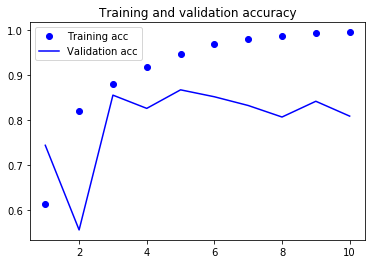

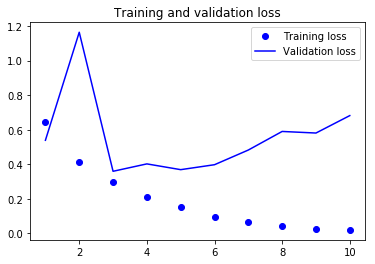

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Change RNN by LSTM

In [9]:
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.models import Sequential


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.5042 - acc: 0.7657 - val_loss: 0.3905 - val_acc: 0.8330
Epoch 2/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2914 - acc: 0.8852 - val_loss: 0.3065 - val_acc: 0.8744
Epoch 3/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2289 - acc: 0.9112 - val_loss: 0.3428 - val_acc: 0.8806
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1981 - acc: 0.9269 - val_loss: 0.3976 - val_acc: 0.8724
Epoch 5/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1765 - acc: 0.9351 - val_loss: 0.3092 - val_acc: 0.8820
Epoch 6/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1542 - acc: 0.9414 - val_loss: 0.3605 - val_acc: 0.8746
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1426 - acc: 0.9492 - val_loss: 0.3887 - val_acc:

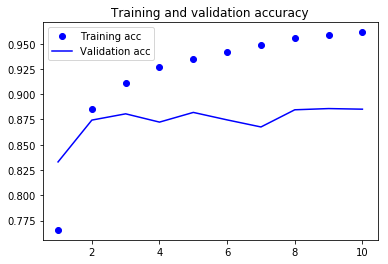

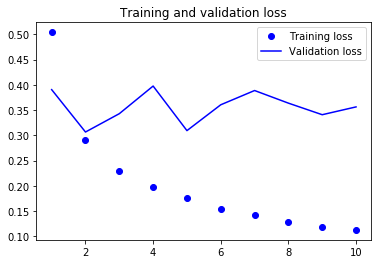

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# RNN for dino names exercise 
Implementando RNN como ejercicio para generar nombres de dinosaurios
Funcionamiento:
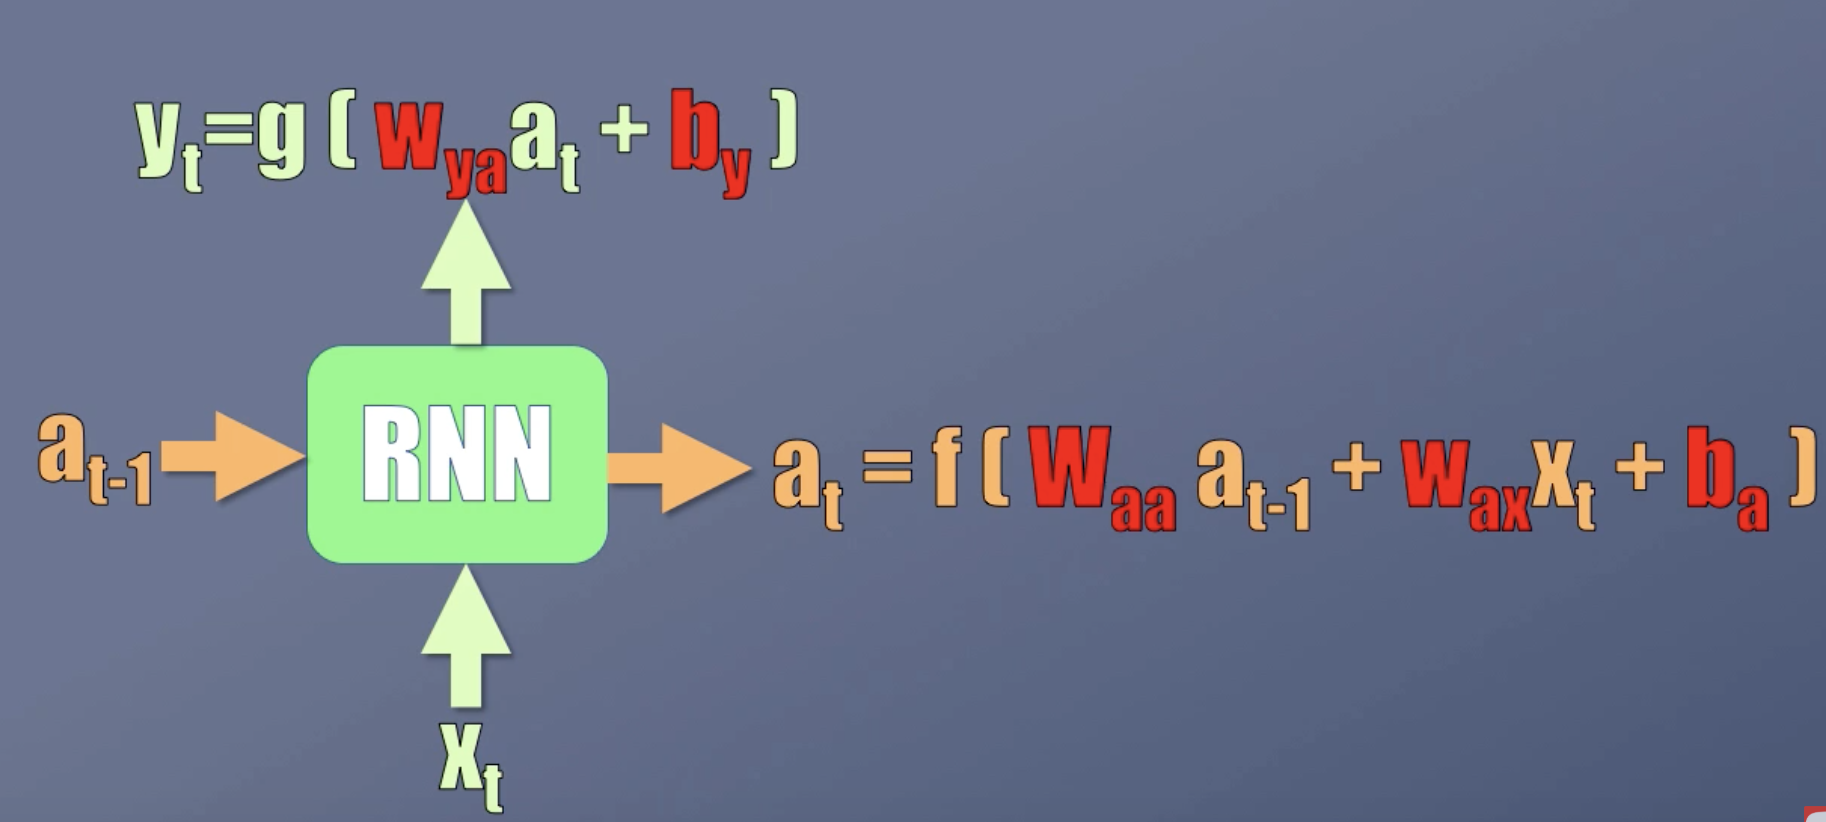

In [1]:
# Importaciones
import numpy as np
np.random.seed(5) # reproducibilidad
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import backend as K



Using TensorFlow backend.


In [6]:
# Carga de datos
names = open('dinonames.txt', 'r').read()
names = names.lower()

alphabet = list(set(names))
tam_alphabet = len(alphabet)
# Conversión de caracteres a índices y viceversa
car_a_ind = { car:ind for ind,car in enumerate(sorted(alphabet))} # caracter a indice
ind_a_car = { ind:car for ind,car in enumerate(sorted(alphabet))} # indice a caracter
print(car_a_ind)
#print(ind_a_car)



{'\n': 0, 'a': 1, 'c': 3, 'b': 2, 'e': 5, 'd': 4, 'g': 7, 'f': 6, 'i': 9, 'h': 8, 'k': 11, 'j': 10, 'm': 13, 'l': 12, 'o': 15, 'n': 14, 'q': 17, 'p': 16, 's': 19, 'r': 18, 'u': 21, 't': 20, 'w': 23, 'v': 22, 'y': 25, 'x': 24, 'z': 26}


In [11]:
# Modelo
n_a = 25 # numero de neuronas 
entrada = Input(shape=(None, tam_alphabet)) # con None hago variable 
a0 = Input(shape=(n_a,)) # hidden state o estado oculto
celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state=True) # a la salida entregue el nuevo estado oculto actualizado
capa_salida = Dense(tam_alphabet, activation='softmax')

hidden_s, _ = celda_recurrente(entrada, initial_state=a0)
salida = []
salida.append(capa_salida(hidden_s))
print "Entrada:\n", entrada, "\n a0:\n", a0, "\nSalida:\n", salida
modelo = Model([entrada, a0], salida)

opt = SGD(lr=0.005)
modelo.compile(optimizer=opt, loss='categorical_crossentropy')



Entrada:
Tensor("input_9:0", shape=(?, ?, 27), dtype=float32) 
 a0:
Tensor("input_10:0", shape=(?, 25), dtype=float32) 
Salida:
Tensor("dense_5/Softmax:0", shape=(?, 27), dtype=float32)


In [21]:
# Crear lista con ejemplos de entrenamiento y mezclarla aleatoriamente
with open("dinonames.txt") as f:
    ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]
np.random.shuffle(ejemplos)

# Crear ejemplos de entrenamiento usando un generador
def train_generator():
    while True:
        # Tomar un ejemplo aleatorio
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

        # Convertir el ejemplo a representación numérica
        X = [None] + [car_a_ind[c] for c in ejemplo]

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [car_a_ind['\n']]

        # Representar "X" y "Y" en formato one-hot
        x = np.zeros((len(X),1,tam_alphabet))
        onehot = to_categorical(X[1:],tam_alphabet).reshape(len(X)-1,1,tam_alphabet)
        x[1:,:,:] = onehot
        y = to_categorical(Y,tam_alphabet).reshape(len(X),tam_alphabet)

        # Activación inicial (matriz de ceros)
        a = np.zeros((len(X), n_a))

        yield [x, a], y


In [24]:
# 4. ENTRENAMIENTO
# ===========================================================
BATCH_SIZE = 80			# Número de ejemplos de entrenamiento a usar en cada iteración
NITS = 10000			# Número de iteraciones

for j in range(NITS):
    historia = modelo.fit_generator(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)

    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%100 == 0:
        print('\nIteración: %d, Error: %f' % (j, historia.history['loss'][0]) + '\n')


# 5. GENERACIÓN DE NOMBRES USANDO EL MODELO ENTRENADO
# ===========================================================
def generar_nombre(modelo,car_a_num,tam_alphabet,n_a):
    # Inicializar x y a con ceros
    x = np.zeros((1,1,tam_alphabet,))
    a = np.zeros((1, n_a))

    # Nombre generado y caracter de fin de linea
    nombre_generado = ''
    fin_linea = '\n'
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          y = capa_salida(a)
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alphabet)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alphabet).reshape(1,1,tam_alphabet)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)

# Generar 100 ejemplos de nombres generados por el modelo ya entrenado
for i in range(100):
    generar_nombre(modelo,car_a_ind,tam_alphabet,n_a)


Iteración: 0, Error: 2.255038


Iteración: 100, Error: 2.241836


Iteración: 200, Error: 2.169192


Iteración: 300, Error: 2.226048


Iteración: 400, Error: 2.234637


Iteración: 500, Error: 2.173275


Iteración: 600, Error: 2.142878


Iteración: 700, Error: 2.183769


Iteración: 800, Error: 2.248378


Iteración: 900, Error: 2.165530


Iteración: 1000, Error: 2.198726


Iteración: 1100, Error: 2.057042


Iteración: 1200, Error: 2.083142


Iteración: 1300, Error: 2.112325


Iteración: 1400, Error: 2.170419


Iteración: 1500, Error: 2.148586


Iteración: 1600, Error: 2.183167


Iteración: 1700, Error: 2.199537


Iteración: 1800, Error: 2.116416


Iteración: 1900, Error: 2.117450


Iteración: 2000, Error: 2.231821


Iteración: 2100, Error: 2.162393


Iteración: 2200, Error: 2.091726


Iteración: 2300, Error: 2.077278


Iteración: 2400, Error: 2.144494


Iteración: 2500, Error: 2.044545


Iteración: 2600, Error: 2.119734


Iteración: 2700, Error: 2.142486


Iteración: 2800, Error: 2.17891

KeyboardInterrupt: 